In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



Read the dataset to the python environment

In [75]:
data=pd.read_csv("iris.csv")

In [76]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Do necessary pre-processing steps

In [77]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


C:\Users\Jibin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


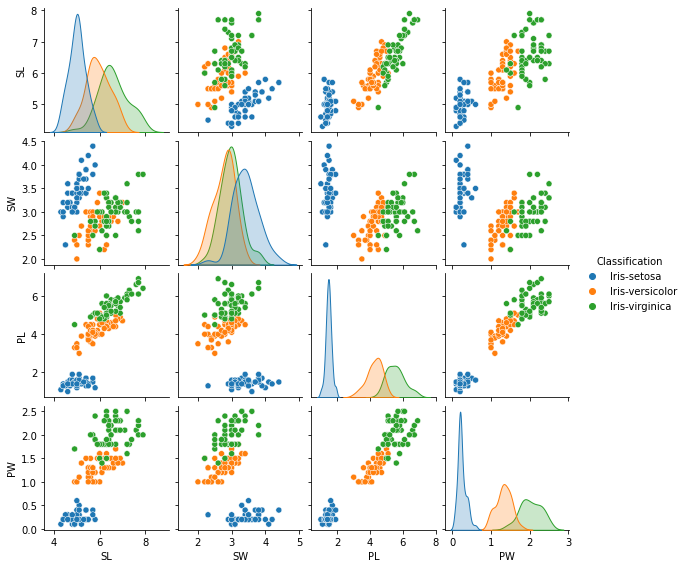

In [80]:
sns.pairplot(data,hue='Classification',size=2)

<AxesSubplot:>

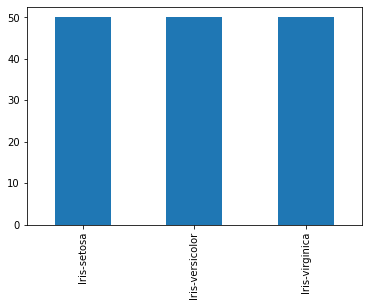

In [81]:
data['Classification'].value_counts().plot.bar()

In [82]:
features = list(data.columns)

print(features)

['SL', 'SW', 'PL', 'PW', 'Classification']


In [83]:
features.remove('Classification')

print(features)

['SL', 'SW', 'PL', 'PW']


In [84]:
Y = data.Classification
X = data[features].values.astype(np.float32)

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [98]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [99]:
x_train=train[['SL','SW','PL','PW']]
y_train=train.Classification
x_test=test[['SL','SW','PL','PW']]
y_test=test.Classification

DECISION TREE

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [101]:
dtmodel=DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
dtpredict=dtmodel.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,dtpredict))

0.9333333333333333


LOGISTIC REGRESSION

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('logistic regression classifier: {:.2f}'.format(logreg.score(x_test, y_test)))

logistic regression classifier: 0.93


C:\Users\Jibin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PERCEPTRON

In [104]:
from sklearn.linear_model import Perceptron
pn = Perceptron(tol=1e-3, random_state=0)
pn.fit(x_train, y_train)
pn.score(x_train,y_train)

0.9619047619047619

In [105]:
pn.score(x_test,y_test)

1.0

RANDOM FOREST CLASSIFIER

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn import metrics 
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred,y_test))

The accuracy of the Random forest is: 0.9333333333333333


Random forest classifier and neural network model is suitable